## 3.1 Create and Train a Convolutional Neural Network (CNN) model 

In [1]:
# necessary imports
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.preprocessing import image
from keras.preprocessing.image import  img_to_array
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')


Using TensorFlow backend.


In [2]:
%%time
#prepareing imgs to be trained

# input image dimensions
m,n = 128,128  

# path of the pre-processed imgs
train_path = os.path.join(os.getcwd(), "dataset", "train") # ..\PyClassifier\dataset\train 

# getting classes/labels of the imgs
classes = os.listdir(train_path)
classes.sort()
print("All Labels: " + str(classes))

x=[] # train imgs
y=[] # train labels

# loop through pre-processed imgs saving them and their corresponding classes/labels
for fol in classes:
    print("[STATUS] Processing folder: {}".format(fol))
    imgfiles=os.listdir(os.path.join(train_path, fol) )
    for img in imgfiles:
        im=Image.open(os.path.join(train_path, fol, img))
        im=im.convert(mode='RGB')
        #im=im.resize((m,n)) # iff img is not resized
        imrs=img_to_array(im)/255
        imrs=imrs.transpose(2,0,1)
        imrs=imrs.reshape(3,m,n)
        x.append(imrs)
        y.append(fol)
        
x=np.array(x)
y=np.array(y)

# nb of classes/labels
nb_classes=len(classes)

#splitting data; 0.2= 20% test data and 80% train data 
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=4)

uniques, id_train=np.unique(y_train,return_inverse=True)
Y_train=np_utils.to_categorical(id_train,nb_classes)

uniques, id_test=np.unique(y_test,return_inverse=True)
Y_test=np_utils.to_categorical(id_test,nb_classes)

print('Done!')

All Labels: ['axes', 'boots', 'carabiners', 'crampons', 'gloves', 'hardshell_jackets', 'harnesses', 'helmets', 'insulated_jackets', 'pulleys', 'rope', 'tents']
[STATUS] Processing folder: axes
[STATUS] Processing folder: boots
[STATUS] Processing folder: carabiners
[STATUS] Processing folder: crampons
[STATUS] Processing folder: gloves
[STATUS] Processing folder: hardshell_jackets
[STATUS] Processing folder: harnesses
[STATUS] Processing folder: helmets
[STATUS] Processing folder: insulated_jackets
[STATUS] Processing folder: pulleys
[STATUS] Processing folder: rope
[STATUS] Processing folder: tents
Done!
Wall time: 2.69 s


In [3]:
%%time
#preparing the model
from keras.models import load_model

load_saved_model= "false"  # change at your preference
model_path = os.path.join(os.getcwd(), "snapshots", "my_CNN_model.h5")

if load_saved_model == "true":
    #load previous saved model
    model = load_model(model_path)  

else:
    #build a new model
    nb_filters=32
    nb_pool=2
    nb_conv=3
    
    model = Sequential()
    model.add(Convolution2D(nb_filters,nb_conv,data_format='channels_last',activation='relu',input_shape=x_train.shape[1:]))
    model.add(MaxPooling2D(pool_size=(nb_pool,nb_pool)))
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

# show stats
model.summary()

print('Done!')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 126, 32)        36896     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 63, 16)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1008)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               129152    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 12)                1548      
_________________________________________________________________
activation_1 (Activation)    (None, 12)                0         
Total para

In [4]:
%%time
#Train and save the model locally 

batch_size=6
nb_epoch=100 # increase epochs for better accuracy results

# Train the model, iterating on the data in batches of 6 samples
history = model.fit(x_train,Y_train,batch_size=batch_size,epochs=nb_epoch,verbose=1,validation_data=(x_test, Y_test))

#save the model locally
model.save(model_path)   

Train on 1697 samples, validate on 425 samples
Epoch 1/100
1697/1697 [==============================] - 4s 2ms/step - loss: 2.1788 - acc: 0.2946 - val_loss: 1.6603 - val_acc: 0.4753
Epoch 2/100
1697/1697 [==============================] - 4s 2ms/step - loss: 1.6755 - acc: 0.4738 - val_loss: 1.5549 - val_acc: 0.4894
Epoch 3/100
1697/1697 [==============================] - 4s 2ms/step - loss: 1.3876 - acc: 0.5698 - val_loss: 1.1332 - val_acc: 0.6706
Epoch 4/100
1697/1697 [==============================] - 4s 2ms/step - loss: 1.2336 - acc: 0.6270 - val_loss: 0.9253 - val_acc: 0.6988
Epoch 5/100
1697/1697 [==============================] - 4s 2ms/step - loss: 1.1147 - acc: 0.6641 - val_loss: 0.8939 - val_acc: 0.7129
Epoch 6/100
1697/1697 [==============================] - 4s 2ms/step - loss: 1.0328 - acc: 0.6871 - val_loss: 0.8222 - val_acc: 0.7624
Epoch 7/100
1697/1697 [==============================] - 4s 2ms/step - loss: 0.9570 - acc: 0.7130 - val_loss: 0.9384 - val_acc: 0.7388
Epoch 8/

Epoch 61/100
1697/1697 [==============================] - 4s 3ms/step - loss: 0.1573 - acc: 0.9558 - val_loss: 0.9293 - val_acc: 0.8518
Epoch 62/100
1697/1697 [==============================] - 4s 2ms/step - loss: 0.1811 - acc: 0.9487 - val_loss: 0.8721 - val_acc: 0.8494
Epoch 63/100
1697/1697 [==============================] - 4s 3ms/step - loss: 0.1569 - acc: 0.9493 - val_loss: 0.9195 - val_acc: 0.8400
Epoch 64/100
1697/1697 [==============================] - 4s 3ms/step - loss: 0.1589 - acc: 0.9517 - val_loss: 0.8474 - val_acc: 0.8424
Epoch 65/100
1697/1697 [==============================] - 4s 3ms/step - loss: 0.1425 - acc: 0.9588 - val_loss: 0.7406 - val_acc: 0.8353
Epoch 66/100
1697/1697 [==============================] - 4s 2ms/step - loss: 0.1454 - acc: 0.9564 - val_loss: 0.8907 - val_acc: 0.8635
Epoch 67/100
1697/1697 [==============================] - 4s 3ms/step - loss: 0.1463 - acc: 0.9629 - val_loss: 0.8971 - val_acc: 0.8612
Epoch 68/100
1697/1697 [========================

Text(0.5, 1.0, 'Accuracy Curves')

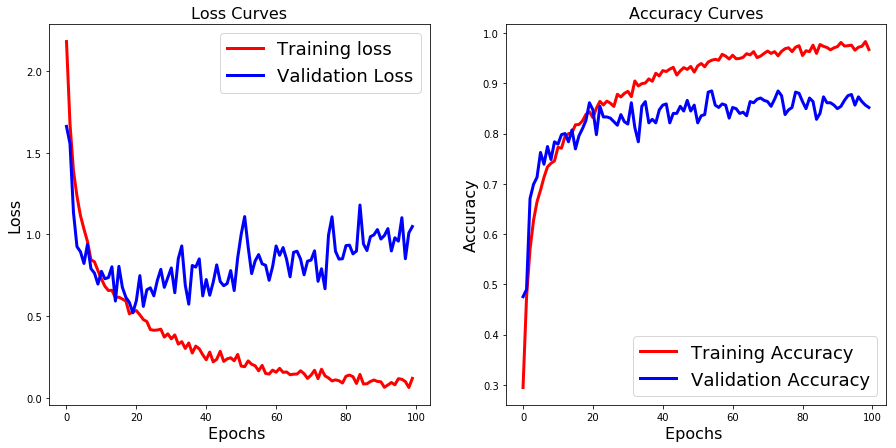

In [5]:
#Check the loss and accuracy curves

f = plt.figure(figsize=[15,7])

# Loss Curves
f.add_subplot(1, 2, 1)
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
f.add_subplot(1, 2, 2)
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
 


## 3.2 Use your model with new data 

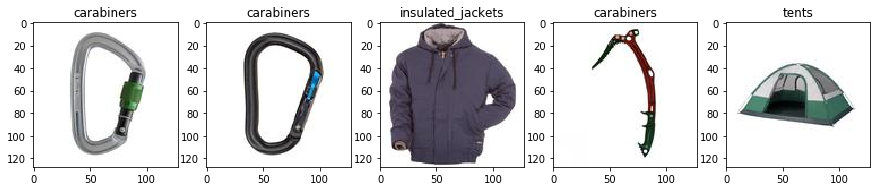

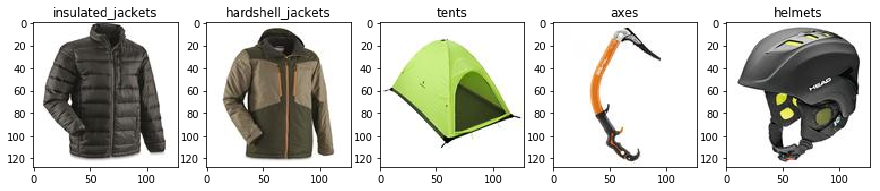

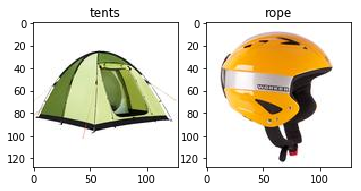

In [6]:
#predict new Imgs
import glob
import cv2

# display img plots as a grid
def grid_display(list_of_images, list_of_titles=[], no_of_columns=2, figsize=(5,5)):
    fig = plt.figure(figsize=figsize)
    column = 0
    for i in range(len(list_of_images)):
        column += 1
        #  check for end of column and create a new figure
        if column == no_of_columns+1:
            fig = plt.figure(figsize=figsize)
            column = 1
        fig.add_subplot(1, no_of_columns, column)
        plt.imshow(list_of_images[i])
        if len(list_of_titles) >= len(list_of_images):
            plt.title(list_of_titles[i])
            
# path to test data
test_path = os.path.join(os.getcwd(), "dataset", "test")   

images=[] #list of tested imgs
titles=[] #list of imgs' titles predicted

# loop through the test images
for file in glob.glob(os.path.join(test_path, "*.*")):
    im = Image.open(file)
    images.append(im)
    im=im.convert(mode='RGB')
    #im=im.resize((m,n)) # iff img is not resized
    im=img_to_array(im)/255
    im=im.transpose(2,0,1)
    im=im.reshape(3,m,n)

    #predict the result
    prediction = model.predict_classes(im.reshape(1,3,m,n))[0]

    titles.append(classes[prediction])
    
grid_display(images, titles, 5, (15,15))




In [7]:
# evaluate the model
score = model.evaluate(x_test, Y_test, batch_size=32)
print(score)

# or
loss, accuracy = model.evaluate(x_test, Y_test, verbose=0)
print('Accuracy: %f' % (accuracy))
print('Loss: %f' % (loss))


425/425 [==============================] - 0s 710us/step
[1.0483398762871237, 0.8517647061628454]
Accuracy: 0.851765
Loss: 1.048340
